In [21]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from TimeSeriesDataset import TimeSeriesDataset

Notebook for testing out the custom TimeSeriesDataset. Is quite old now and not sure if the tests are still compatible.

In [22]:
df_train_2021_u = pd.read_csv('../../data/data_combined/train_2021_combined_u.csv',
                   index_col = 'DateTime', sep = ';', decimal = '.')
df_train_2021_y = pd.read_csv('../../data/data_combined/train_2021_combined_y.csv',
                   index_col = 'DateTime', sep = ';', decimal = '.')
df_train_2022_u = pd.read_csv('../../data/data_combined/train_2022_combined_u.csv',
                   index_col = 'DateTime', sep = ';', decimal = '.')
df_train_2022_y = pd.read_csv('../../data/data_combined/train_2022_combined_y.csv',
                   index_col = 'DateTime', sep = ';', decimal = '.')
df_val_u = pd.read_csv('../../data/data_combined/val_combined_u.csv',
                   index_col = 'DateTime', sep = ';', decimal = '.')
df_val_y = pd.read_csv('../../data/data_combined/val_combined_y.csv',
                   index_col = 'DateTime', sep = ';', decimal = '.')
df_test_u = pd.read_csv('../../data/data_combined/test_combined_u.csv',
                   index_col = 'DateTime', sep = ';', decimal = '.')
df_test_y = pd.read_csv('../../data/data_combined/test_combined_y.csv',
                   index_col = 'DateTime', sep = ';', decimal = '.')

In [23]:
print(df_test_u.head(2))
print(df_test_y.head(2))

                          NO2        O3      PM10      PM25    Q   SQ  \
DateTime                                                                
2022-08-04 00:00:00  0.410848  0.167832  0.195946  0.260177  0.0  0.0   
2022-08-04 01:00:00  0.372781  0.139860  0.168919  0.243308  0.0  0.0   

                           WD      Wmax    Wvh      dewP      temp  
DateTime                                                            
2022-08-04 00:00:00  0.583441  0.058824  0.125  0.769663  0.488189  
2022-08-04 01:00:00  0.602846  0.000000  0.000  0.747191  0.468504  
                          NO2        O3      PM10      PM25
DateTime                                                   
2022-08-04 00:00:00  0.362722  0.104895  0.135135  0.225024
2022-08-04 01:00:00  0.438264  0.125874  0.155405  0.168081


In [24]:
dataset_test = TimeSeriesDataset([df_test_u], [df_test_y], 1, 48, 8, 1)
dataset_test_6h = TimeSeriesDataset([df_test_u], [df_test_y], 1, 8, 1, 6)

In [25]:
print(dataset_test.n)
print(dataset_test.__len__())
print(dataset_test.__n_features_in__())
print(dataset_test.__n_features_out__())

672
617
11
4


In [26]:
print(dataset_test_6h.n)
print(dataset_test_6h.__len__())
print(dataset_test_6h.__n_features_in__())
print(dataset_test_6h.__n_features_out__())

672
110
11
4


In [27]:
print(dataset_test_6h[dataset_test_6h.__len__() - 1])

(tensor([[0.2663, 0.0979, 0.1284, 0.1936, 0.2046, 0.8000, 0.0285, 0.4118, 0.6250,
         0.3315, 0.4213],
        [0.2047, 0.1469, 0.1757, 0.1804, 0.3516, 0.9000, 0.0259, 0.4706, 0.5000,
         0.4438, 0.5079],
        [0.1424, 0.1329, 0.1622, 0.2081, 0.5043, 0.9000, 0.0220, 0.5294, 0.6250,
         0.4494, 0.5472],
        [0.1154, 0.1608, 0.1892, 0.2288, 0.6542, 1.0000, 0.0220, 0.4706, 0.6250,
         0.4326, 0.6260],
        [0.1178, 0.1748, 0.2027, 0.2044, 0.7061, 0.9000, 0.0194, 0.5294, 0.6250,
         0.4438, 0.6457],
        [0.0751, 0.1608, 0.1892, 0.1689, 0.7061, 1.0000, 0.0246, 0.5294, 0.7500,
         0.3876, 0.6929],
        [0.0679, 0.1399, 0.1689, 0.1729, 0.6888, 0.9000, 0.0285, 0.5294, 0.6250,
         0.3820, 0.7047],
        [0.0594, 0.1329, 0.1622, 0.1451, 0.6340, 0.9000, 0.0323, 0.5294, 0.6250,
         0.3820, 0.7244]]), tensor([[0.0576, 0.1329, 0.1622, 0.1454]]))


In [28]:
u, y = dataset_test.__getitem__(0)
print(u)
print(y)

tensor([[0.4108, 0.1678, 0.1959, 0.2602, 0.0000, 0.0000, 0.5834, 0.0588, 0.1250,
         0.7697, 0.4882],
        [0.3728, 0.1399, 0.1689, 0.2433, 0.0000, 0.0000, 0.6028, 0.0000, 0.0000,
         0.7472, 0.4685],
        [0.2941, 0.1678, 0.1959, 0.2361, 0.0000, 0.0000, 0.5783, 0.0000, 0.0000,
         0.7528, 0.4685],
        [0.2789, 0.1958, 0.2230, 0.3813, 0.0000, 0.0000, 0.5692, 0.0000, 0.1250,
         0.7303, 0.4567],
        [0.2675, 0.1748, 0.2027, 0.2250, 0.0317, 0.3000, 0.5860, 0.1765, 0.1250,
         0.7472, 0.5276],
        [0.4483, 0.1469, 0.1757, 0.2441, 0.0865, 0.2000, 0.5977, 0.0588, 0.1250,
         0.7697, 0.6181],
        [0.6718, 0.1259, 0.1554, 0.2278, 0.1614, 0.0000, 0.6093, 0.1765, 0.2500,
         0.7809, 0.6575],
        [0.5454, 0.1888, 0.2162, 0.2306, 0.2882, 0.1000, 0.6248, 0.2353, 0.3750,
         0.7921, 0.6929],
        [0.4937, 0.1049, 0.1351, 0.1618, 0.5562, 0.8000, 0.6378, 0.2941, 0.3750,
         0.7865, 0.7559],
        [0.4160, 0.1958, 0.2230, 0.15

In [29]:
print(dataset_test.__len__())

617


In [30]:
print(dataset_test[dataset_test.__len__() - 2])
print(dataset_test[dataset_test.__len__() - 1])

(tensor([[0.0454, 0.1748, 0.2027, 0.1782, 0.3026, 0.7000, 0.1410, 0.3529, 0.3750,
         0.5393, 0.6535],
        [0.0521, 0.0839, 0.1149, 0.1903, 0.2680, 1.0000, 0.1423, 0.2941, 0.3750,
         0.5674, 0.6417],
        [0.0412, 0.0769, 0.1081, 0.1439, 0.1095, 1.0000, 0.1410, 0.2941, 0.3750,
         0.6180, 0.6024],
        [0.0456, 0.0979, 0.1284, 0.1802, 0.0086, 0.0000, 0.1397, 0.2353, 0.3750,
         0.6573, 0.5472],
        [0.0684, 0.1469, 0.1757, 0.2547, 0.0000, 0.0000, 0.1410, 0.3529, 0.3750,
         0.6461, 0.5197],
        [0.1219, 0.1678, 0.1959, 0.2084, 0.0000, 0.0000, 0.1397, 0.3529, 0.3750,
         0.6292, 0.4882],
        [0.1162, 0.1538, 0.1824, 0.3014, 0.0000, 0.0000, 0.1358, 0.2941, 0.3750,
         0.6067, 0.4646],
        [0.0627, 0.1259, 0.1554, 0.2268, 0.0000, 0.0000, 0.1345, 0.2941, 0.3750,
         0.6011, 0.4331],
        [0.0531, 0.1119, 0.1419, 0.1732, 0.0000, 0.0000, 0.1384, 0.2353, 0.3750,
         0.5955, 0.4134],
        [0.0748, 0.1399, 0.1689, 0.1

In [31]:
test_loader = DataLoader(dataset_test, batch_size = 16, shuffle = False)
print(len(test_loader))

for idx, (seq_in, seq_out) in enumerate(test_loader):
    if idx % 2 == 0:
        print(idx, seq_in.shape, seq_out.shape)

39
0 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
2 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
4 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
6 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
8 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
10 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
12 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
14 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
16 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
18 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
20 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
22 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
24 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
26 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
28 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
30 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
32 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
34 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
36 torch.Size([16, 48, 11]) torch.Size([16, 8, 4])
38 torch.Size([9, 48, 11]) torch.

In [32]:
dfs_u = [df_train_2021_u, df_train_2022_u]
dfs_y = [df_train_2021_y, df_train_2022_y]
dataset_train = TimeSeriesDataset(dfs_u, dfs_y, 2, 8, 1, 1)

In [33]:
print(dataset_train.n)
print(dataset_train.__len__())
print(dataset_train.__n_features_in__())
print(dataset_train.__n_features_out__())

3072
3056
11
4


In [34]:
# Last sample of 2021
u, y = dataset_train.__getitem__(2199)
print(u)
print(y)
u_test, y_test = dataset_train.__getitem__(df_train_2021_u.shape[0] - 8 - 1)
if torch.equal(u, u_test):
    print("Equal")
# First sample of 2022
u, y = dataset_train.__getitem__(2200)
print(u)
print(y)
u_test, y_test = dataset_train.__getitem__(dataset_train.__len__() - 1 - df_train_2022_u.shape[0] + 8 + 1)
if torch.equal(u, u_test):
    print("Equal")

tensor([[0.0454, 0.4232, 0.1622, 0.2503, 0.1556, 0.0000, 0.7814, 0.4706, 0.6250,
         0.6067, 0.4882],
        [0.0521, 0.4154, 0.1892, 0.2921, 0.0778, 0.0000, 0.7801, 0.4118, 0.5000,
         0.5674, 0.4724],
        [0.0525, 0.4397, 0.1622, 0.2403, 0.0231, 0.0000, 0.7788, 0.3529, 0.5000,
         0.5674, 0.4528],
        [0.0578, 0.4309, 0.1554, 0.2321, 0.0058, 0.0000, 0.7775, 0.4118, 0.3750,
         0.5337, 0.4449],
        [0.0408, 0.4200, 0.1486, 0.2133, 0.0000, 0.0000, 0.8215, 0.2353, 0.3750,
         0.5449, 0.4370],
        [0.0452, 0.4169, 0.2230, 0.2016, 0.0000, 0.0000, 0.8642, 0.2941, 0.2500,
         0.5393, 0.4370],
        [0.0325, 0.4312, 0.1689, 0.2449, 0.0000, 0.0000, 0.8616, 0.1765, 0.2500,
         0.5281, 0.4370],
        [0.0469, 0.4254, 0.1959, 0.1659, 0.0000, 0.0000, 0.8590, 0.1765, 0.2500,
         0.5225, 0.4331]])
tensor([[0.1223, 0.4375, 0.1892, 0.1615]])
Equal
tensor([[0.2710, 0.1678, 0.1959, 0.4094, 0.0000, 0.0000, 0.5679, 0.2353, 0.3750,
         0.36

Test the get_full_y_sequence() function

torch.Size([672, 4])


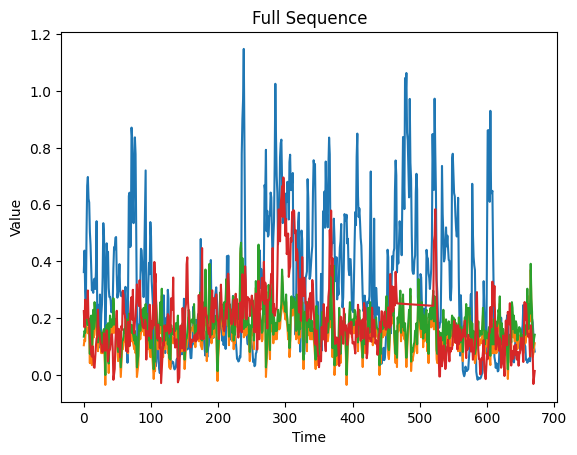

In [35]:
full_sequence = dataset_test.get_full_y_sequence()
print(full_sequence.shape)

import matplotlib.pyplot as plt

plt.plot(full_sequence)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Full Sequence')
plt.show()


In [36]:
print(dataset_test[0][0].shape)
print(dataset_test[0][1].shape)
print(dataset_test[1][0].shape)
print(dataset_test[1][1].shape)

torch.Size([48, 11])
torch.Size([8, 4])
torch.Size([48, 11])
torch.Size([8, 4])


In [38]:
idx = 0
input_data = dataset_test[idx][0].unsqueeze(0)
ground_truth = dataset_test[idx][1].unsqueeze(0)
print(input_data.shape)
print(ground_truth.shape)
print(input_data)
print(ground_truth)

torch.Size([1, 48, 11])
torch.Size([1, 8, 4])
tensor([[[0.4108, 0.1678, 0.1959, 0.2602, 0.0000, 0.0000, 0.5834, 0.0588,
          0.1250, 0.7697, 0.4882],
         [0.3728, 0.1399, 0.1689, 0.2433, 0.0000, 0.0000, 0.6028, 0.0000,
          0.0000, 0.7472, 0.4685],
         [0.2941, 0.1678, 0.1959, 0.2361, 0.0000, 0.0000, 0.5783, 0.0000,
          0.0000, 0.7528, 0.4685],
         [0.2789, 0.1958, 0.2230, 0.3813, 0.0000, 0.0000, 0.5692, 0.0000,
          0.1250, 0.7303, 0.4567],
         [0.2675, 0.1748, 0.2027, 0.2250, 0.0317, 0.3000, 0.5860, 0.1765,
          0.1250, 0.7472, 0.5276],
         [0.4483, 0.1469, 0.1757, 0.2441, 0.0865, 0.2000, 0.5977, 0.0588,
          0.1250, 0.7697, 0.6181],
         [0.6718, 0.1259, 0.1554, 0.2278, 0.1614, 0.0000, 0.6093, 0.1765,
          0.2500, 0.7809, 0.6575],
         [0.5454, 0.1888, 0.2162, 0.2306, 0.2882, 0.1000, 0.6248, 0.2353,
          0.3750, 0.7921, 0.6929],
         [0.4937, 0.1049, 0.1351, 0.1618, 0.5562, 0.8000, 0.6378, 0.2941,
        